In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
Le = LabelEncoder()

In [3]:
df = pd.read_csv('./Data/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [7]:
X["Sex"] = Le.fit_transform(X["Sex"])
X["Sex"]

C:\Users\piyus\AppData\Local\Temp\ipykernel_6116\1120556697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = Le.fit_transform(X["Sex"])


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [8]:
X["Age"].fillna(X["Age"].mean(), inplace=True)

C:\Users\piyus\AppData\Local\Temp\ipykernel_6116\1090114700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Age"].fillna(X["Age"].mean(), inplace=True)
C:\Users\piyus\AppData\Local\Temp\ipykernel_6116\1090114700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].mean(), inplace=True)


In [9]:
X["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [10]:
y = df["Survived"]

In [11]:
survived_counts = y.value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

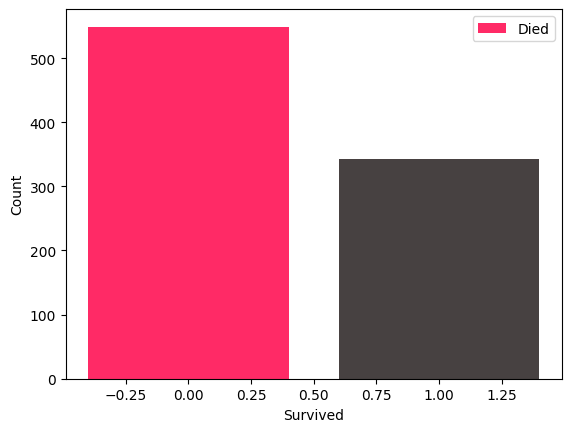

In [12]:
plt.bar(survived_counts.index, survived_counts.values, color=["#ff2a66","#474141"])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(["Died", "Survived"])
plt.show()

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
model.score(x_test, y_test)

0.7486033519553073

In [21]:
scoreMatrix = confusion_matrix(y_test, model.predict(x_test))
scoreMatrix

array([[83, 22],
       [23, 51]])

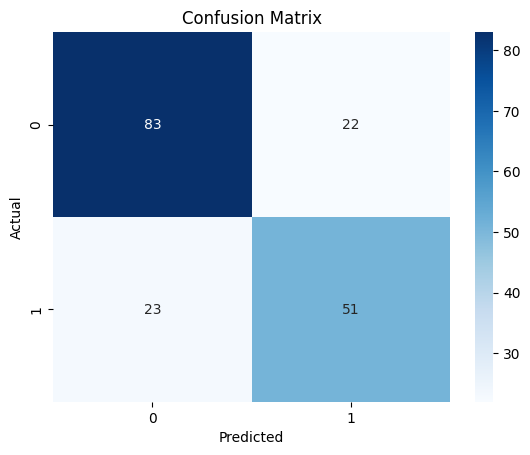

In [22]:
import seaborn as sns

sns.heatmap(scoreMatrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
import joblib
joblib.dump(model, "TitanicModel.pkl")

['TitanicModel.pkl']